In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
# based largely on on http://alexanderfabisch.github.io/t-sne-in-scikit-learn.html

import glob


# Guh fine, I think this is annoying
%pylab inline



/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [2]:
# todo, this sucks or isn't working
def line_filter(lines):
#     lines = [k for k in lines if not k[0].isdigit()]
#     lines = [k for k in lines if not k[1].isdigit()]        
    lines = [k for k in lines if k.count("@") < 2]
    lines = [k for k in lines if k.count(";") < 2]
    lines = [k for k in lines if k.count(":") < 2]
    lines = [k for k in lines if not k.count("<") and not k.count('>')]        
    lines = [k for k in lines if not k.startswith('Sent')]
    lines = [k for k in lines if not k.startswith('From')]
    lines = [k for k in lines if not k.startswith('To')]
    return lines

def strip_stuff(email):
    lines = line_filter( email.split('\n') )
    return '\n'.join(lines)
    

In [3]:
split_emails = []
# split_emails.extend([3,1,1])
for filename in glob.glob('ScottPruittEmails//*.txt'):
    # print(filename)
    emails_file = open(filename)
    emails_text = emails_file.read()
    # split_emails = emails.split('\n\n')
    emails_for_file = emails_text.split('From:')
    # print( len(split_emails))
    # this just puts the from back
    emails_for_file = list(map(lambda x: 'From:'+x, emails_for_file))
    split_emails.extend(emails_for_file)
len(split_emails)

6003

In [4]:
# single_line_filter(split_emails[].split('\n'))
# split_emails = ['z'+k for k in split_emails]
split_emails = list(map(lambda x: strip_stuff(x), split_emails))

split_emails = [k for k in split_emails if len(k) > 5]
split_emails = [k for k in split_emails if k.count(" ") > 5]

len(split_emails)

5942

In [5]:
split_emails[9]

'\n\n\n\n\n\n\nJim Smith is in - Florida 1979 - 1987 \n\n\nBrenda Murphy on behalf of J im Smith \n\nSouthern Strategy Group \n123 South Adams Street \nTallahassee, FL 32301 \n\nTelephone: 850.671.4401 \nFacsimile: 850.671.4402 \n\n\n\n\n\nSTRATEGY GROUP \n\n\nTallahassee | Jacksonville [ Orlando | Tampa Bay | Miami | Austin | Baton Rouge | Shreveport | Jackson | Montgomery \n| Atlanta | Columbia | Raleigh | Nashville | Frankfort | Lansing | Madison \n\n\n'

In [6]:
len(split_emails)

5942

In [7]:
tfidv = TfidfVectorizer()
vectors = tfidv.fit_transform(split_emails)

In [8]:
print(repr(vectors))
tfidv.get_feature_names()


<5942x20974 sparse matrix of type '<class 'numpy.float64'>'
	with 618493 stored elements in Compressed Sparse Row format>


['00',
 '000',
 '00000',
 '000001',
 '000002',
 '000003',
 '000004',
 '000005',
 '000006',
 '000007',
 '000008',
 '000009',
 '000010',
 '000011',
 '000012',
 '000013',
 '000014',
 '000015',
 '000017',
 '000018',
 '000020',
 '000021',
 '000027',
 '000028',
 '000029',
 '000030',
 '000031',
 '000032',
 '000033',
 '000034',
 '000035',
 '000036',
 '000037',
 '000038',
 '000039',
 '000040',
 '000041',
 '000042',
 '000043',
 '000044',
 '000045',
 '000046',
 '000047',
 '000048',
 '000049',
 '000050',
 '000051',
 '000052',
 '000053',
 '000054',
 '000055',
 '000056',
 '000057',
 '000058',
 '000059',
 '000060',
 '000061',
 '000062',
 '000063',
 '000064',
 '000065',
 '000066',
 '000067',
 '000068',
 '000069',
 '000070',
 '000071',
 '000072',
 '000073',
 '000074',
 '000086',
 '000087',
 '000088',
 '000089',
 '000090',
 '0001',
 '000126',
 '000127',
 '000133',
 '000134',
 '000135',
 '000136',
 '000169',
 '000170',
 '000171',
 '000174',
 '000175',
 '000178',
 '000239',
 '000240',
 '000244',
 '000245'

In [9]:
from sklearn.decomposition import TruncatedSVD
X_reduced = TruncatedSVD(n_components=50, random_state=0).fit_transform(vectors)

In [10]:

# X_embedded = TSNE(n_components=, perplexity=40, verbose=2).fit_transform(X_reduced)
X_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_reduced)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 5942
[t-SNE] Computed conditional probabilities for sample 2000 / 5942
[t-SNE] Computed conditional probabilities for sample 3000 / 5942
[t-SNE] Computed conditional probabilities for sample 4000 / 5942
[t-SNE] Computed conditional probabilities for sample 5000 / 5942
[t-SNE] Computed conditional probabilities for sample 5942 / 5942
[t-SNE] Mean sigma: 0.068340
[t-SNE] Iteration 25: error = 1.6328939, gradient norm = 0.0116004
[t-SNE] Iteration 50: error = 1.5797952, gradient norm = 0.0074857
[t-SNE] Iteration 75: error = 1.3162045, gradient norm = 0.0027051
[t-SNE] Iteration 100: error = 1.2532592, gradient norm = 0.0023391
[t-SNE] Error after 100 iterations with early exaggeration: 1.253259
[t-SNE] Iteration 125: error = 1.1411514, gradient norm = 0.0018407
[t-SNE] Iteration 150: error = 1.1027690, gradient norm = 0.0017703
[t-SNE] Iteration 

In [11]:
X_embedded_as_list = X_embedded.tolist()
X_embedded[0]


array([ 5.5419111 ,  8.08247441])

In [12]:
# wrap_at = 60 #30
# from textwrap import wrap
# def add_breaks(t):
#     return "\n".join(wrap(t, wrap_at))


# split_emails_with_breaks = [add_breaks(e) for e in split_emails]



In [13]:
# from pylab import rcParams
# rcParams['figure.figsize'] = 15, 15

cmap=plt.get_cmap('viridis')

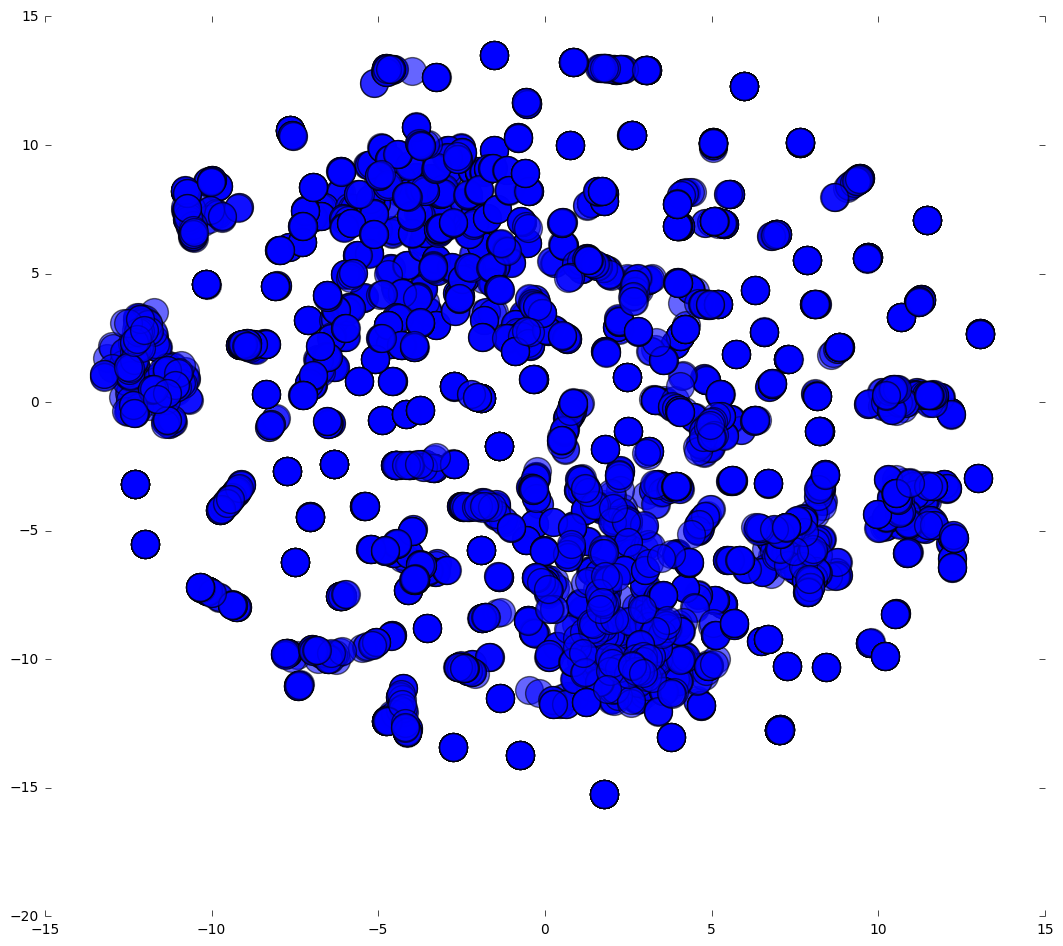

In [15]:
fig = figure(figsize=(10, 10))
# fig = figure(figsize=(100, 100))
# fig = figure(figsize=(20, 20))

ax = axes(frameon=False)
# setp(ax, xticks=(), yticks=())

subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9, wspace=0.0, hspace=0.0)
scatter(X_embedded[:, 0], X_embedded[:, 1], s=400, alpha=0.6)
# scatter(X_embedded[:, 0], X_embedded[:, 1], c=X_embedded[:, 2], s=400, alpha=0.6)


# scatter(X_embedded[:, 0], X_embedded[:, 1], c=X_embedded[:, 2], s=5000, alpha=0.01, lw=0)

# plt.axis([-10, 10, -10, 10])

# for text version!
# for i, txt in enumerate(split_emails_with_breaks):
#     ax.annotate(txt, (X_embedded[i][0], X_embedded[i][1]), size=6, wrap=True, ha="center", va="center", alpha=0.9,)
#     bbox={'facecolor': 'white', 'alpha': 0.01}).set_zorder(0)
    
#                 bbox={'alpha': 0.2, 'boxstyle':'round' })
#                 bbox={'facecolor':X_embedded[i][2], 'pad':1, 'alpha': 0.2, 'boxstyle':'round' })

# Audio(url=sound_file, autoplay=True)

In [16]:
data = {"X_embedded":X_embedded_as_list, "split_emails":split_emails}
import json
with open('email_plot_data_2.json', 'w') as fp:
    json.dump(data, fp)